# Card Data 승인건수와 고객 이탈 추이 비교
## Auther: 박응수

In [15]:
import pandas as pd
df = pd.read_csv(f'./dataset/card_newCols_2023.csv', encoding='euc-kr')

In [16]:
df.tail()

,Unnamed: 0,거래년월,고객ID,월별승인금액합계,월별승인건수평균,이탈여부,연령대
1613896,6265856,202312,2431122077,1040000,1.307692,유지,20대
1613897,6265857,202312,3343332290,1110000,1.230769,유지,20대
1613898,6265858,202312,3433762288,810000,1.000000,유지,20대
1613899,6265869,202312,4406597530,2600000,1.037037,유지,30대
1613900,6265872,202312,3557388137,250000,1.000000,유지,20대


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613901 entries, 0 to 1613900
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1613901 non-null  int64  
 1   거래년월        1613901 non-null  int64  
 2   고객ID        1613901 non-null  int64  
 3   월별승인금액합계    1613901 non-null  int64  
 4   월별승인건수평균    1613901 non-null  float64
 5   이탈여부        1613901 non-null  object 
 6   연령대         1613901 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 86.2+ MB


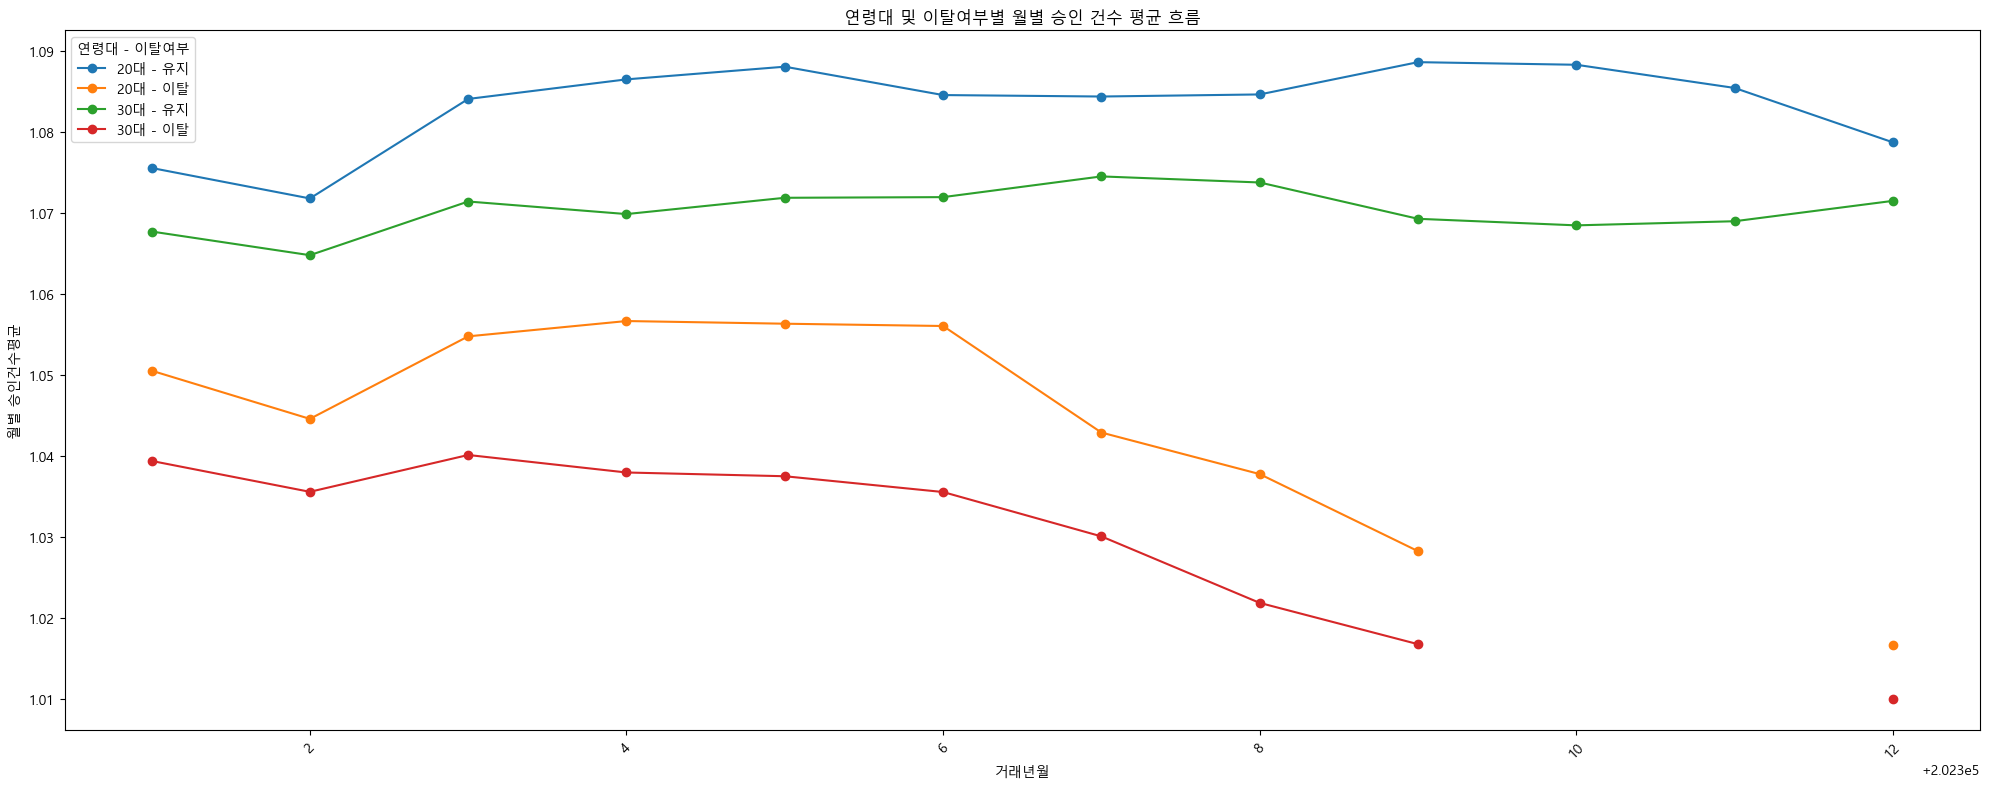

In [18]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 사용자의 경우

df_selected = df[['거래년월', '연령대', '이탈여부', '월별승인건수평균']]
grouped = df_selected.groupby(['거래년월', '연령대', '이탈여부'])['월별승인건수평균'].mean().unstack(['연령대', '이탈여부'])

fig, ax = plt.subplots(figsize=(20, 8))
for col in grouped.columns:
    ax.plot(grouped.index, grouped[col], marker='o', label=f'{col[0]} - {col[1]}')

ax.set_title('연령대 및 이탈여부별 월별 승인 건수 평균 흐름')
ax.set_xlabel('거래년월')
ax.set_ylabel('월별 승인건수평균')
ax.legend(title='연령대 - 이탈여부')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 월별평균승인건수 잘못 도출
# 코드(IM2030.ipynb): df['월별승인건수평균'] = df.groupby(['거래년월','고객ID'])['승인건수'].transform('sum') / df.groupby(['거래년월','고객ID'])['승인건수'].transform('count')
# 이유: 승인 건수는 업종별로 나누기 때문에, 당연히 5회미만이 압도적으로 많음 -> 따라서 지금의 코드대로 한다면 월별평균승인건수가 1.1도 넘지 않음.

# 내 생각: 월별 시각화을 보려면, 우리가 설정한 범주(승인건수 1~5)의 분포를 봐야할것 같음.

import pandas as pd

def read_file1(year):
    PATH = f'./dataset/CARD_{year}.csv'
    df = pd.read_csv(PATH, encoding='euc-kr', usecols=['거래년월', '고객ID', '승인건수', '승인금액'])
    df = df.sort_values(by='거래년월', ascending=True).reset_index(drop=True)
    
    # 승인건수를 범주화
    df.loc[df['승인건수'] == '5번이하', '승인건수'] = 1
    df.loc[df['승인건수'] == '5번초과 10번이하', '승인건수'] = 2
    df.loc[df['승인건수'] == '10번초과 15번이하', '승인건수'] = 3
    df.loc[df['승인건수'] == '15번초과 20번이하', '승인건수'] = 4
    df.loc[df['승인건수'] == '20번 초과', '승인건수'] = 5
    df['승인건수'] = df['승인건수'].astype(int)  # 숫자형으로 변환

    # 승인금액 합계 계산
    df['월별승인금액합계'] = df.groupby(['거래년월', '고객ID'])['승인금액'].transform('sum')

    # 승인건수 분포 계산
    승인건수분포 = df.groupby(['거래년월', '고객ID', '승인건수']).size().unstack(fill_value=0)
    승인건수분포.columns = [f'승인건수분포_{col}' for col in 승인건수분포.columns]
    
    # 원래 데이터프레임과 병합
    df = df.drop_duplicates(['거래년월', '고객ID'], keep='last')
    df = df.merge(승인건수분포, on=['거래년월', '고객ID'], how='left')
    
    return df

이후 승인건수 drop하지 말것!

In [63]:
import pandas as pd
df1 = pd.read_csv(f'./dataset/card_newCols_modify_2023.csv', encoding='euc-kr')

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613901 entries, 0 to 1613900
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1613901 non-null  int64 
 1   거래년월        1613901 non-null  int64 
 2   고객ID        1613901 non-null  int64 
 3   승인건수        1613901 non-null  int64 
 4   승인금액        1613901 non-null  int64 
 5   월별승인금액합계    1613901 non-null  int64 
 6   승인건수분포_1    1613901 non-null  int64 
 7   승인건수분포_2    1613901 non-null  int64 
 8   승인건수분포_3    1613901 non-null  int64 
 9   승인건수분포_4    1613901 non-null  int64 
 10  승인건수분포_5    1613901 non-null  int64 
 11  이탈여부        1613901 non-null  object
 12  연령대         1613901 non-null  object
dtypes: int64(11), object(2)
memory usage: 160.1+ MB


In [67]:
df1.tail()

,Unnamed: 0,거래년월,고객ID,승인건수,승인금액,월별승인금액합계,승인건수분포_1,승인건수분포_2,승인건수분포_3,승인건수분포_4,승인건수분포_5,이탈여부,연령대
1613896,6265856,202312,2431122077,2,60000,1040000,22,2,1,0,1,유지,20대
1613897,6265857,202312,3343332290,1,10000,1110000,22,3,0,1,0,유지,20대
1613898,6265858,202312,3433762288,1,10000,810000,33,0,0,0,0,유지,20대
1613899,6265869,202312,4406597530,1,10000,2600000,26,1,0,0,0,유지,30대
1613900,6265872,202312,3557388137,1,20000,250000,8,0,0,0,0,유지,20대


In [68]:
df1_filtered = df1[df1['고객ID'] == 2431122077]
df1_filtered

,Unnamed: 0,거래년월,고객ID,승인건수,승인금액,월별승인금액합계,승인건수분포_1,승인건수분포_2,승인건수분포_3,승인건수분포_4,승인건수분포_5,이탈여부,연령대
159682,629116,202302,2431122077,1,40000,40000,1,0,0,0,0,유지,20대
387960,1476731,202303,2431122077,3,80000,920000,23,3,2,0,1,유지,20대
551014,2101068,202304,2431122077,2,40000,790000,26,6,0,1,0,유지,20대
688505,2632060,202305,2431122077,2,70000,1230000,31,6,0,1,0,유지,20대
806809,3099112,202306,2431122077,1,20000,1020000,35,4,1,0,1,유지,20대
957493,3683158,202307,2431122077,3,100000,940000,23,4,2,0,0,유지,20대
1090208,4202049,202308,2431122077,3,130000,890000,19,4,2,0,1,유지,20대
1222624,4720836,202309,2431122077,3,90000,970000,25,0,2,0,1,유지,20대
1354946,5240068,202310,2431122077,2,60000,1020000,18,4,0,1,1,유지,20대
1486213,5757061,202311,2431122077,1,10000,860000,24,1,1,0,1,유지,20대


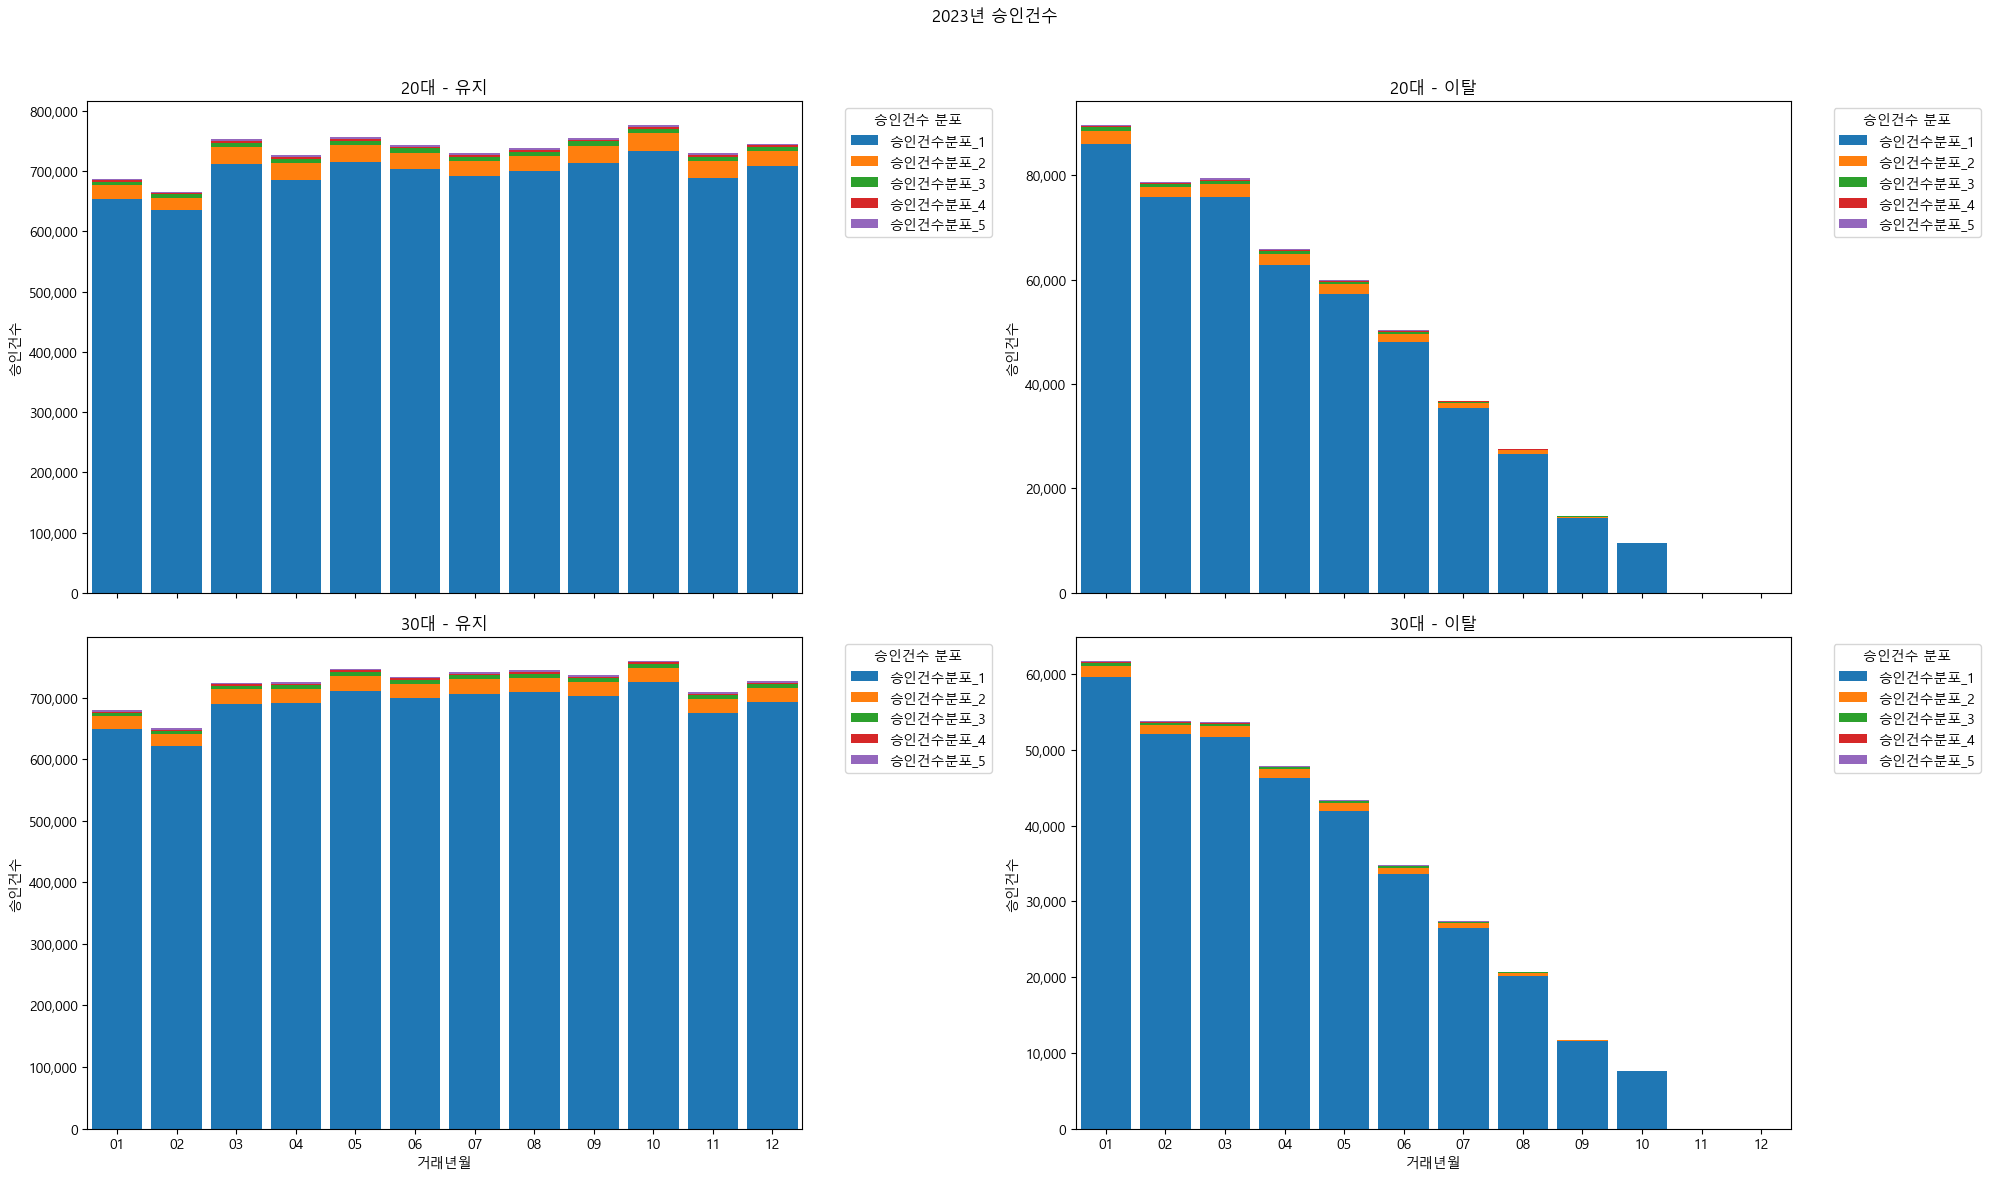

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

df1_selected = df1[['거래년월', '연령대', '이탈여부', '승인건수분포_1', '승인건수분포_2', '승인건수분포_3', '승인건수분포_4', '승인건수분포_5']]
grouped = df1_selected.groupby(['거래년월', '연령대', '이탈여부']).sum().reset_index()

def comma_formatter(x, pos):
    return f'{int(x):,}'

# 그래프 설정
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True)
fig.suptitle('2023년 승인건수')

month_labels = [f"{month:02}" for month in range(1, 13)]

# 연령대와 이탈여부별로 서브플롯에 그래프 생성
for (age, churn), ax in zip(grouped.groupby(['연령대', '이탈여부']).groups.keys(), axes.flatten()):
    data = grouped[(grouped['연령대'] == age) & (grouped['이탈여부'] == churn)]
    
    data.set_index('거래년월', inplace=True)
    data[['승인건수분포_1', '승인건수분포_2', '승인건수분포_3', '승인건수분포_4', '승인건수분포_5']].plot(kind='bar', stacked=True, ax=ax, width=0.85)  # 막대 너비를 줄임
    
    ax.set_title(f'{age} - {churn}')
    ax.set_ylabel('승인건수')
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))  # y축에 천 단위 콤마 추가
    ax.legend(title='승인건수 분포', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 모든 서브플롯에 대해 x축 레이블을 '01' ~ '12'로 설정하고 가로로 회전
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_labels, rotation=0) 
    ax.set_xlim(-0.5, 11.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

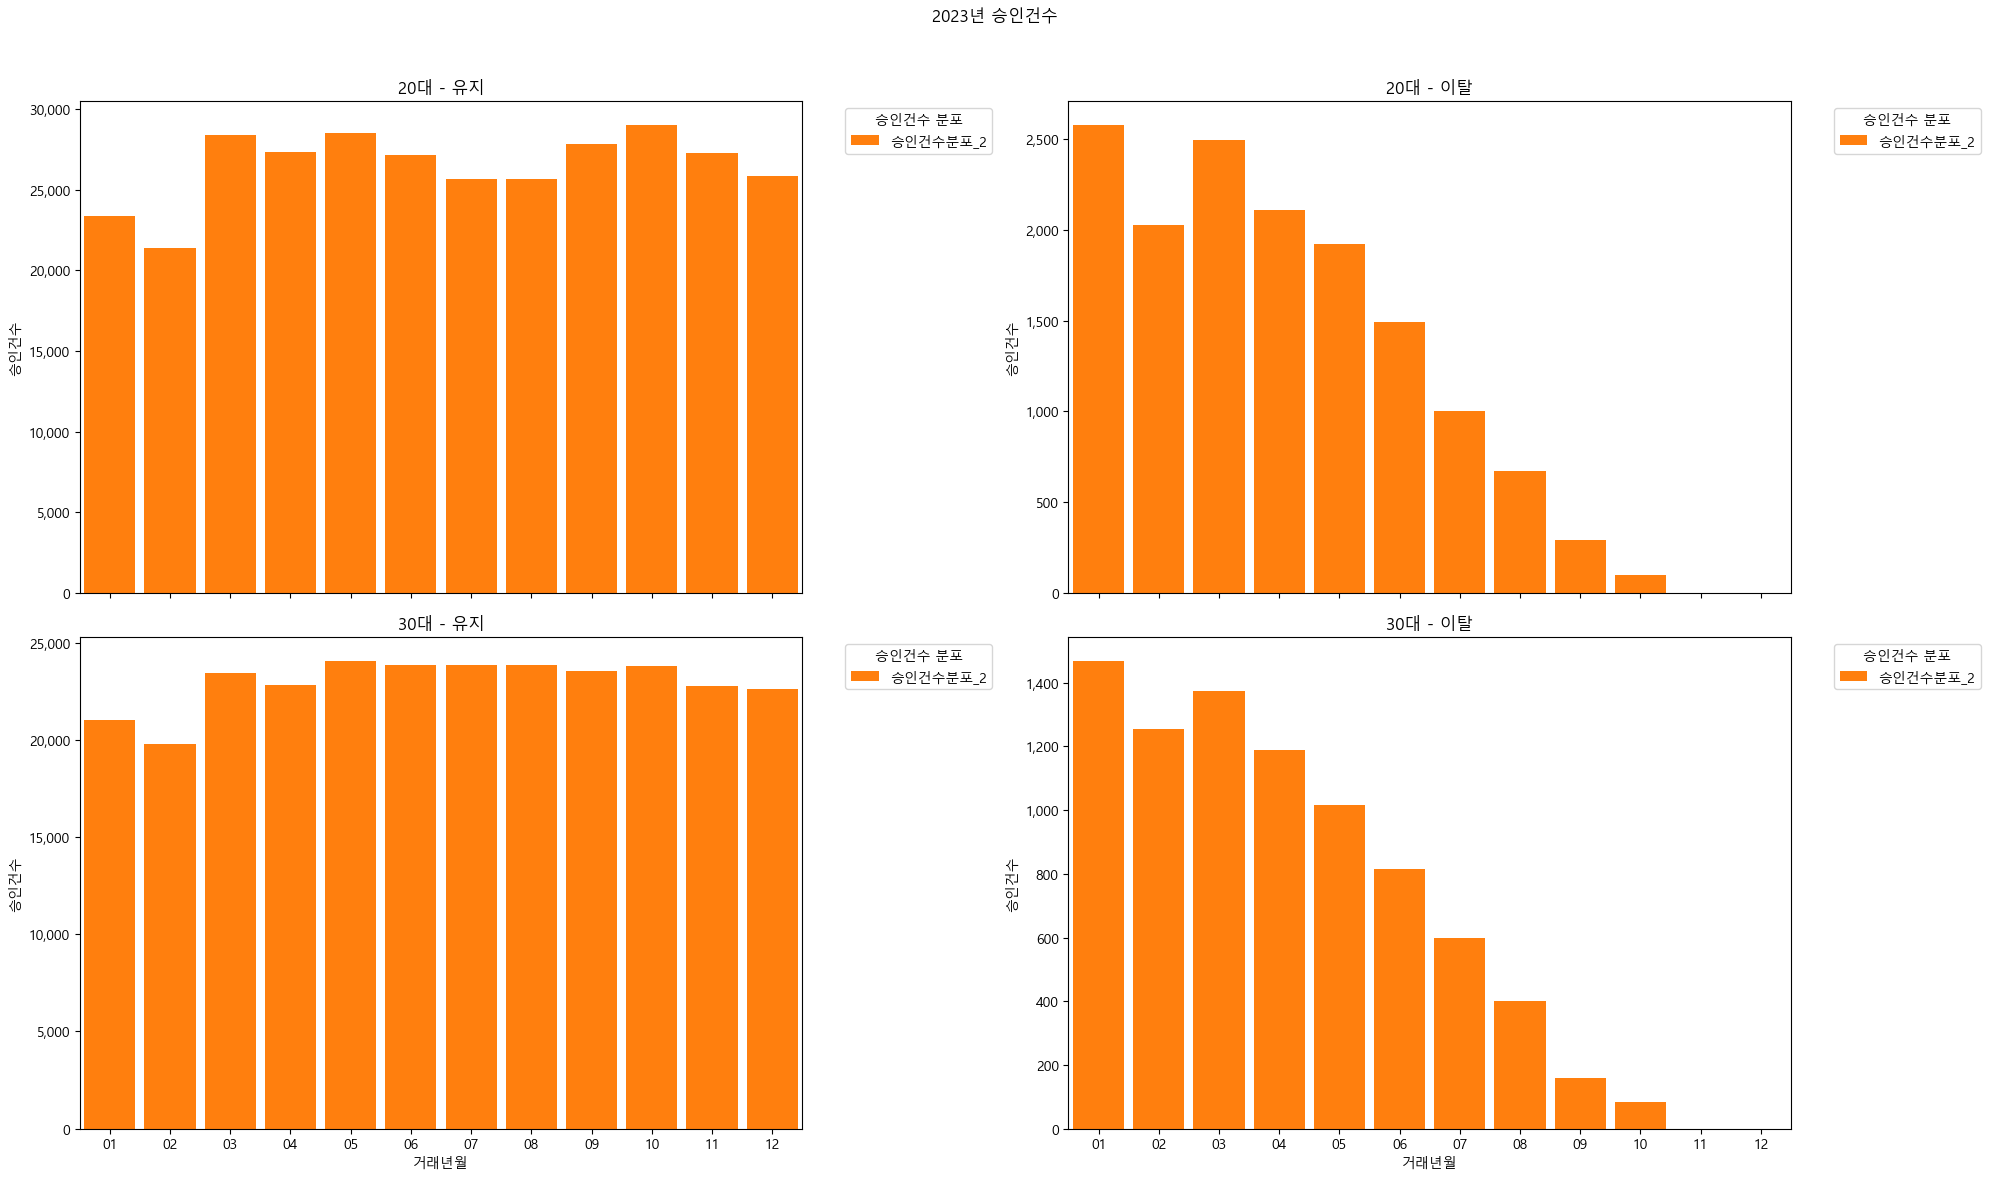

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

df1_selected = df1[['거래년월', '연령대', '이탈여부', '승인건수분포_2']]
grouped = df1_selected.groupby(['거래년월', '연령대', '이탈여부']).sum().reset_index()

def comma_formatter(x, pos):
    return f'{int(x):,}'

# 그래프 설정
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True)
fig.suptitle('2023년 승인건수')

month_labels = [f"{month:02}" for month in range(1, 13)]

# 연령대와 이탈여부별로 서브플롯에 그래프 생성
for (age, churn), ax in zip(grouped.groupby(['연령대', '이탈여부']).groups.keys(), axes.flatten()):
    data = grouped[(grouped['연령대'] == age) & (grouped['이탈여부'] == churn)]
    
    data.set_index('거래년월', inplace=True)
    data[['승인건수분포_2']].plot(kind='bar', stacked=True, ax=ax, width=0.85, color='#ff7f0e')  # 막대 너비를 줄임
    
    ax.set_title(f'{age} - {churn}')
    ax.set_ylabel('승인건수')
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))  # y축에 천 단위 콤마 추가
    ax.legend(title='승인건수 분포', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 모든 서브플롯에 대해 x축 레이블을 '01' ~ '12'로 설정하고 가로로 회전
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_labels, rotation=0) 
    ax.set_xlim(-0.5, 11.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

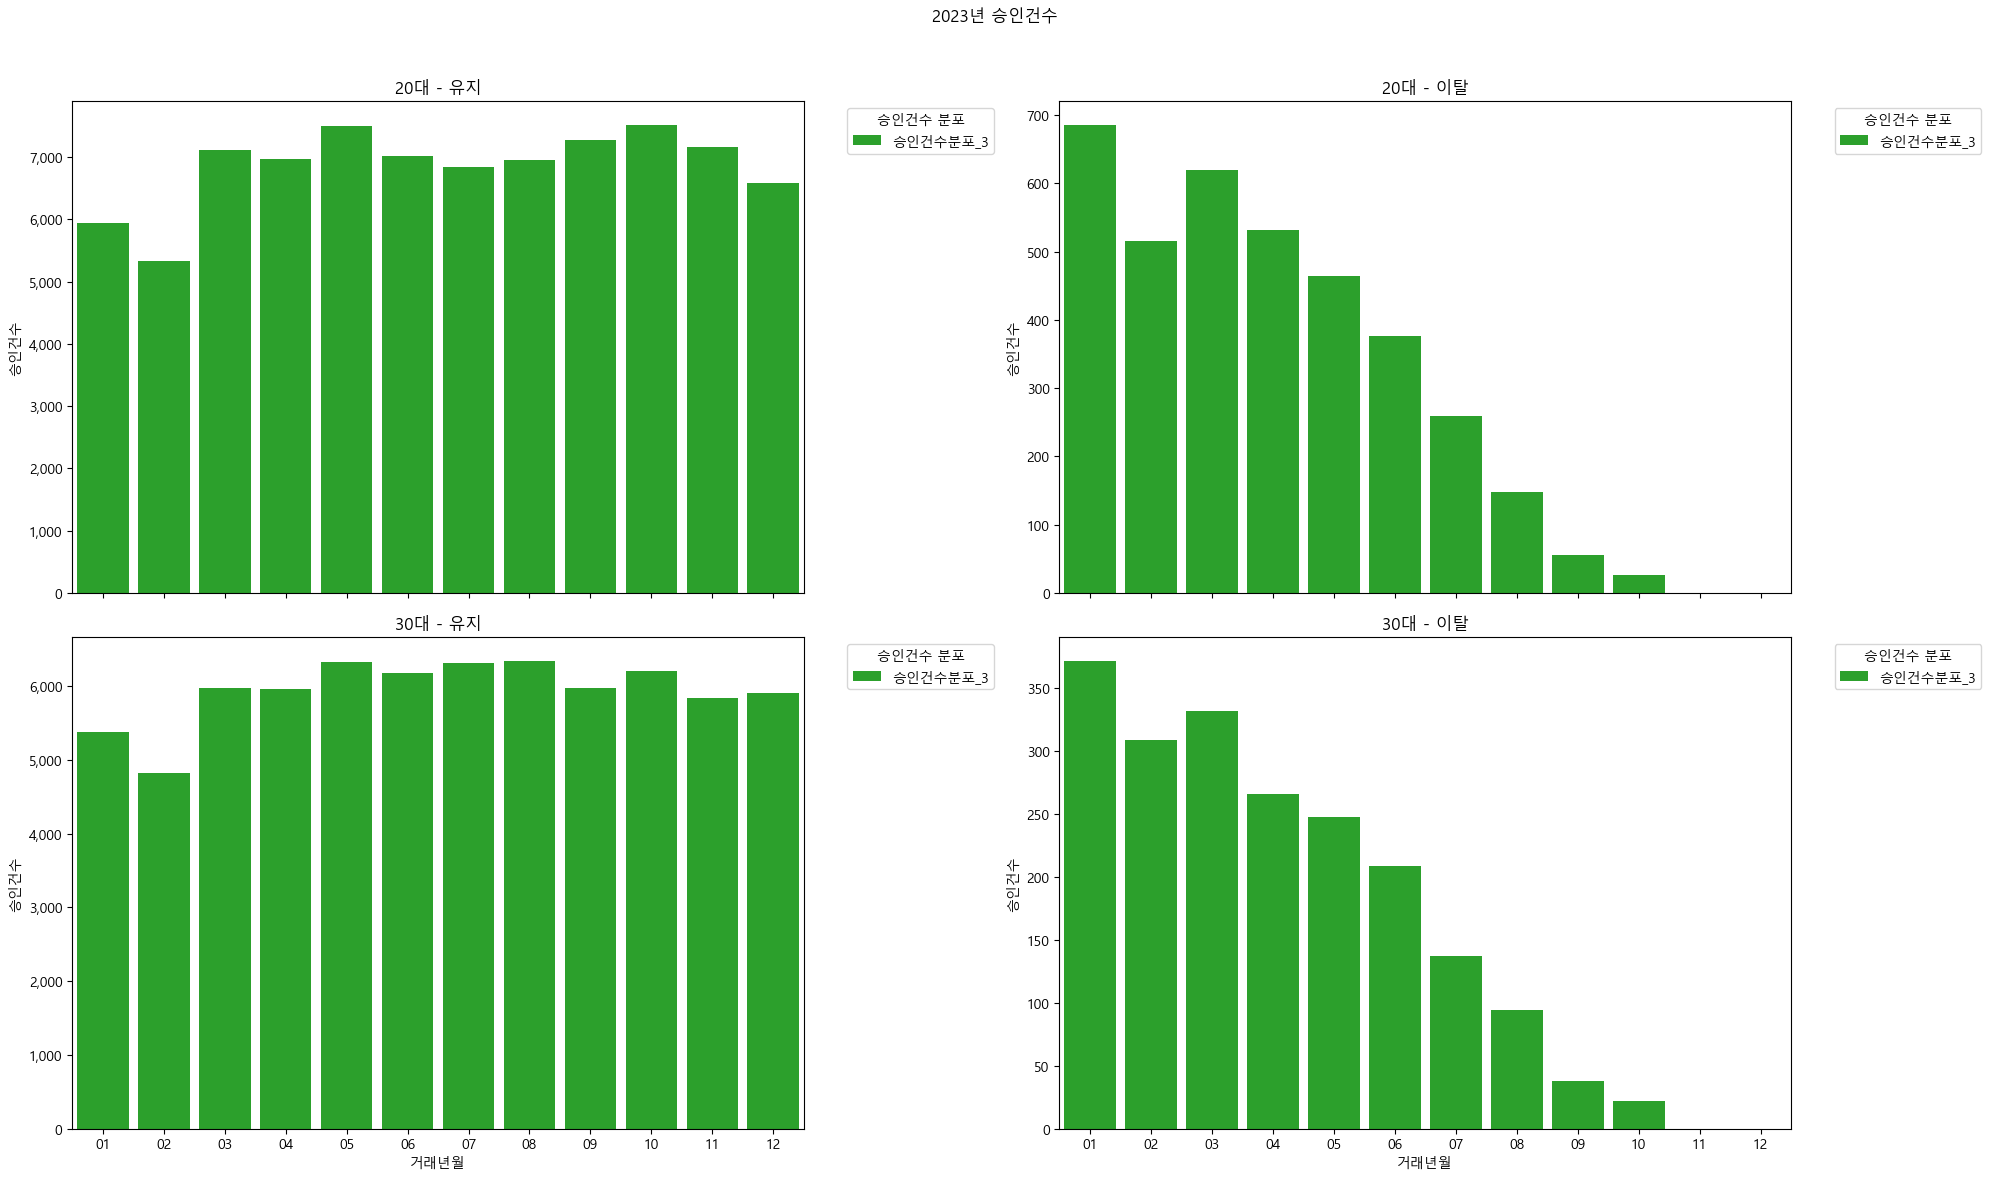

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

df1_selected = df1[['거래년월', '연령대', '이탈여부', '승인건수분포_3']]
grouped = df1_selected.groupby(['거래년월', '연령대', '이탈여부']).sum().reset_index()

def comma_formatter(x, pos):
    return f'{int(x):,}'

# 그래프 설정
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True)
fig.suptitle('2023년 승인건수')

month_labels = [f"{month:02}" for month in range(1, 13)]

# 연령대와 이탈여부별로 서브플롯에 그래프 생성
for (age, churn), ax in zip(grouped.groupby(['연령대', '이탈여부']).groups.keys(), axes.flatten()):
    data = grouped[(grouped['연령대'] == age) & (grouped['이탈여부'] == churn)]
    
    data.set_index('거래년월', inplace=True)
    data[['승인건수분포_3']].plot(kind='bar', stacked=True, ax=ax, width=0.85, color='#2ca02c')  # 막대 너비를 줄임
    
    ax.set_title(f'{age} - {churn}')
    ax.set_ylabel('승인건수')
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))  # y축에 천 단위 콤마 추가
    ax.legend(title='승인건수 분포', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 모든 서브플롯에 대해 x축 레이블을 '01' ~ '12'로 설정하고 가로로 회전
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_labels, rotation=0) 
    ax.set_xlim(-0.5, 11.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

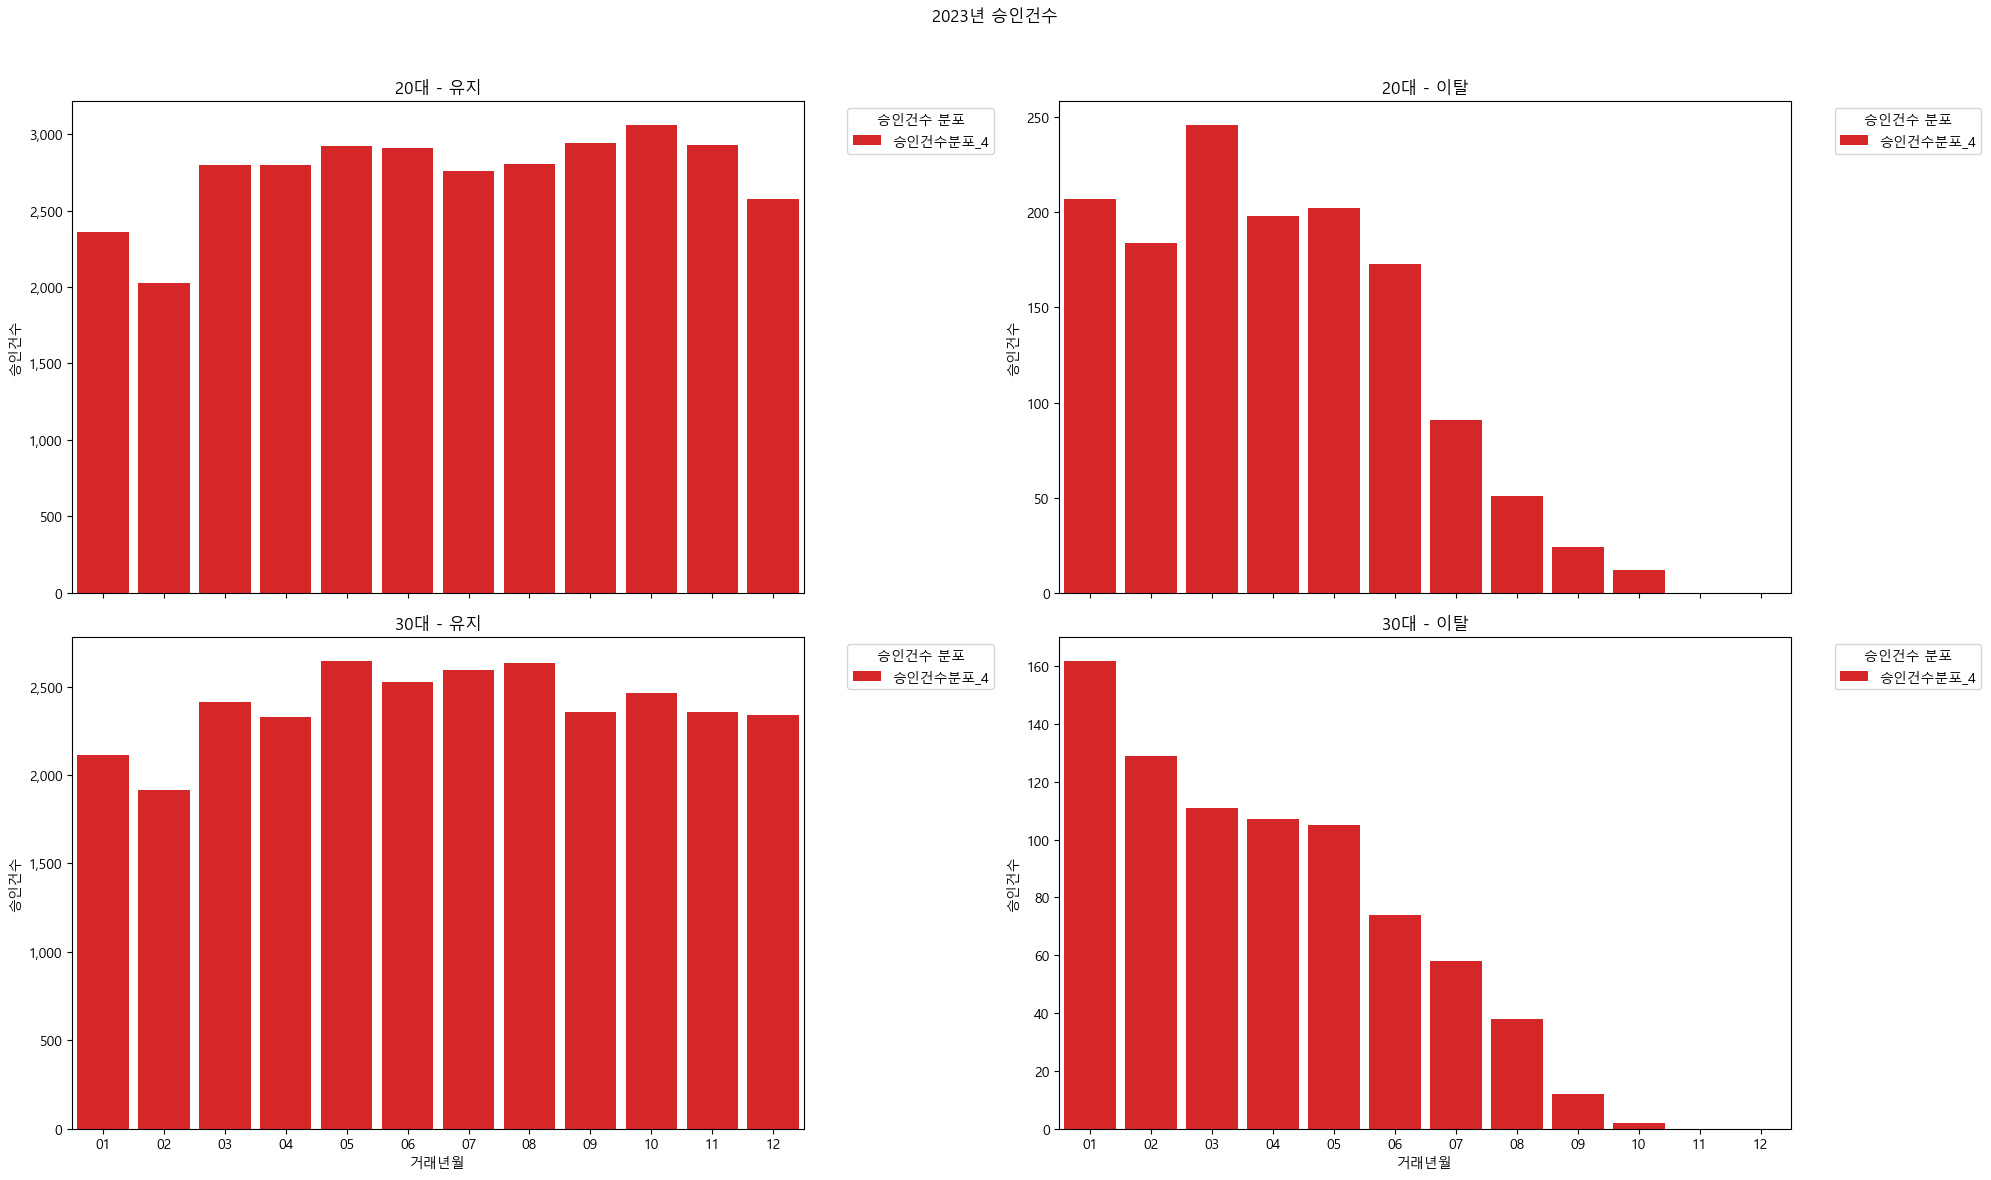

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

df1_selected = df1[['거래년월', '연령대', '이탈여부', '승인건수분포_4']]
grouped = df1_selected.groupby(['거래년월', '연령대', '이탈여부']).sum().reset_index()

def comma_formatter(x, pos):
    return f'{int(x):,}'

# 그래프 설정
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True)
fig.suptitle('2023년 승인건수')

month_labels = [f"{month:02}" for month in range(1, 13)]

# 연령대와 이탈여부별로 서브플롯에 그래프 생성
for (age, churn), ax in zip(grouped.groupby(['연령대', '이탈여부']).groups.keys(), axes.flatten()):
    data = grouped[(grouped['연령대'] == age) & (grouped['이탈여부'] == churn)]
    
    data.set_index('거래년월', inplace=True)
    data[['승인건수분포_4']].plot(kind='bar', stacked=True, ax=ax, width=0.85, color='#d62728')  # 막대 너비를 줄임
    
    ax.set_title(f'{age} - {churn}')
    ax.set_ylabel('승인건수')
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))  # y축에 천 단위 콤마 추가
    ax.legend(title='승인건수 분포', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 모든 서브플롯에 대해 x축 레이블을 '01' ~ '12'로 설정하고 가로로 회전
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_labels, rotation=0) 
    ax.set_xlim(-0.5, 11.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

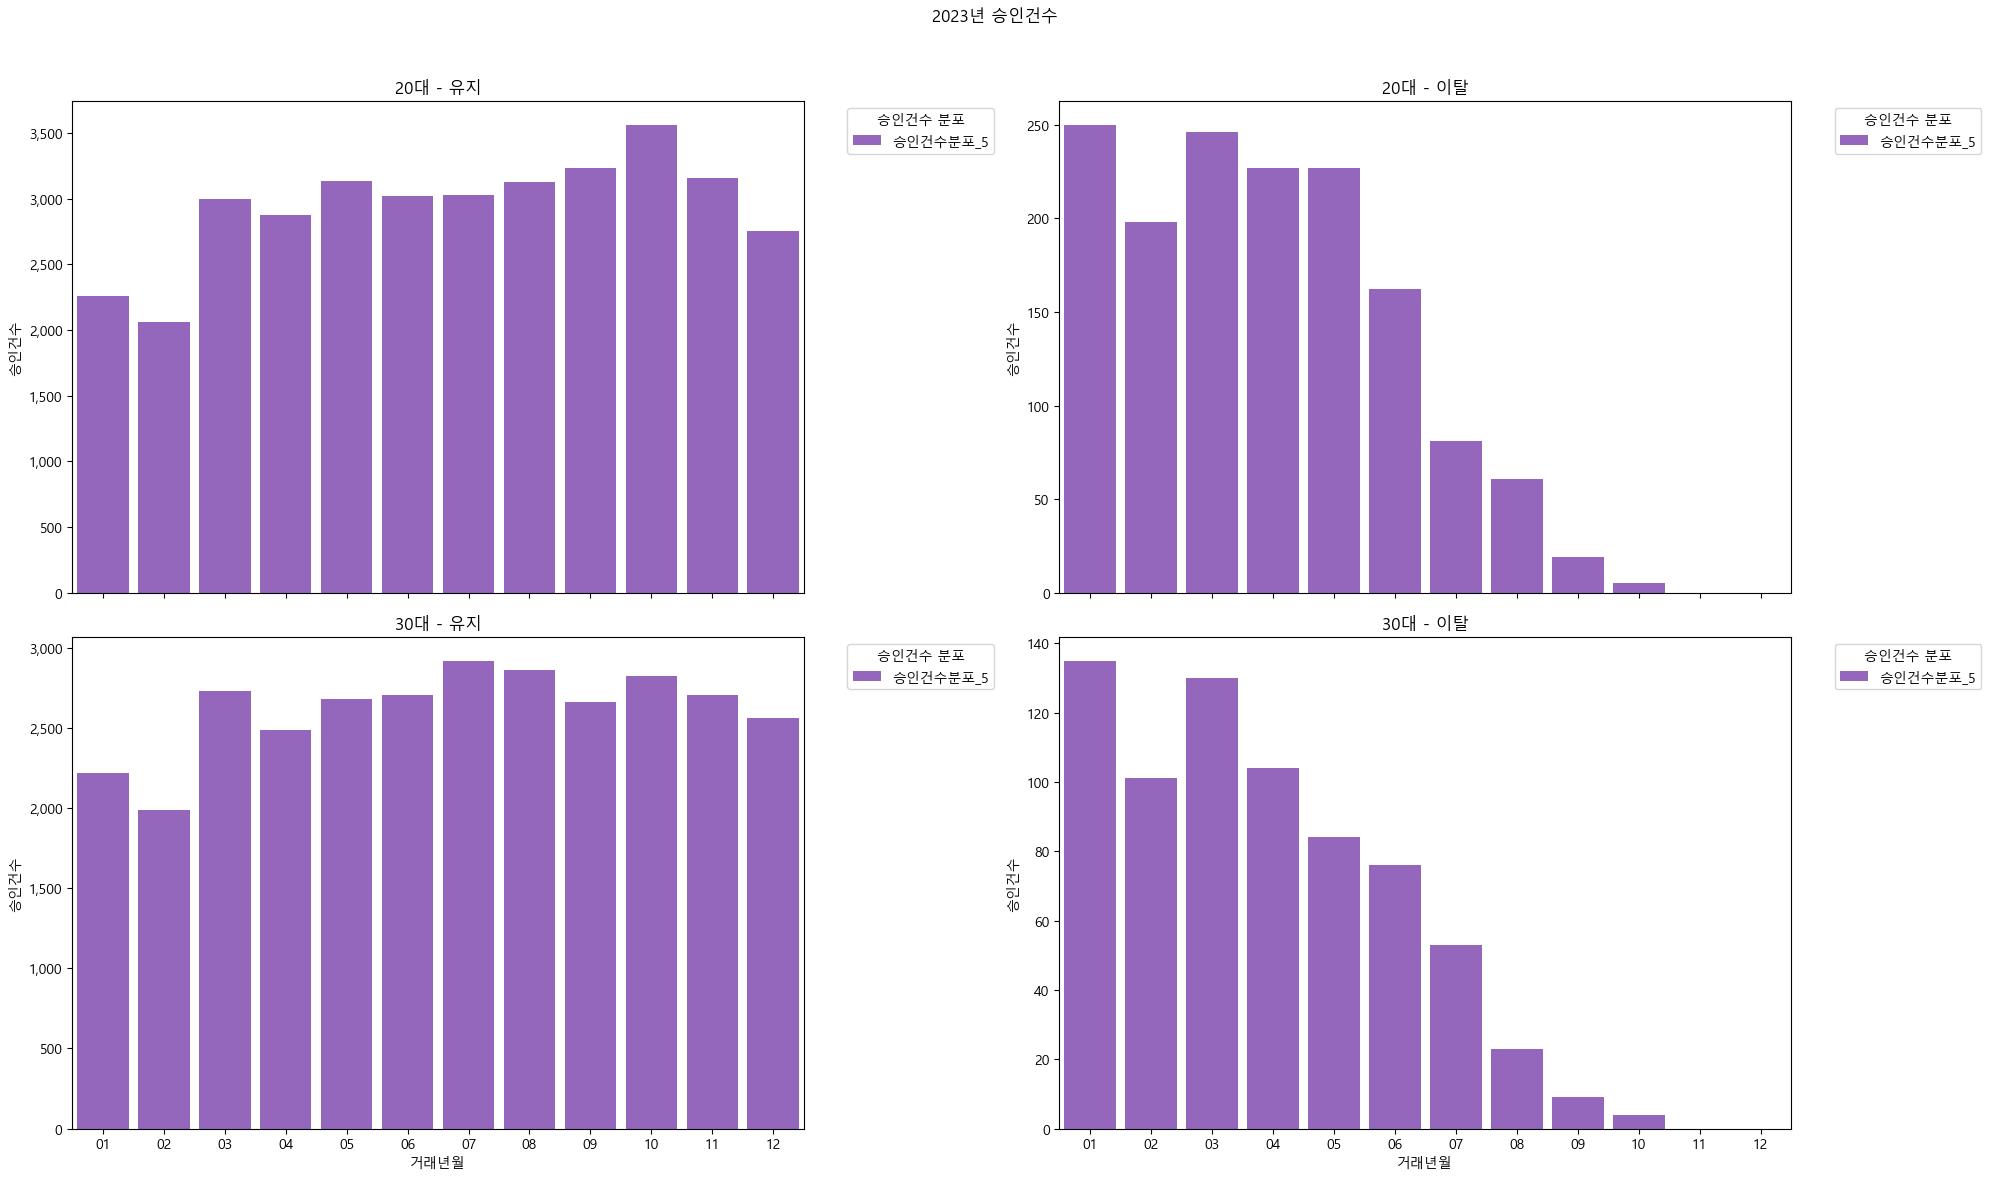

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

df1_selected = df1[['거래년월', '연령대', '이탈여부', '승인건수분포_5']]
grouped = df1_selected.groupby(['거래년월', '연령대', '이탈여부']).sum().reset_index()

def comma_formatter(x, pos):
    return f'{int(x):,}'

# 그래프 설정
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True)
fig.suptitle('2023년 승인건수')

month_labels = [f"{month:02}" for month in range(1, 13)]

# 연령대와 이탈여부별로 서브플롯에 그래프 생성
for (age, churn), ax in zip(grouped.groupby(['연령대', '이탈여부']).groups.keys(), axes.flatten()):
    data = grouped[(grouped['연령대'] == age) & (grouped['이탈여부'] == churn)]
    
    data.set_index('거래년월', inplace=True)
    data[['승인건수분포_5']].plot(kind='bar', stacked=True, ax=ax, width=0.85, color='#9467bd')  # 막대 너비를 줄임
    
    ax.set_title(f'{age} - {churn}')
    ax.set_ylabel('승인건수')
    ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))  # y축에 천 단위 콤마 추가
    ax.legend(title='승인건수 분포', bbox_to_anchor=(1.05, 1), loc='upper left')

    # 모든 서브플롯에 대해 x축 레이블을 '01' ~ '12'로 설정하고 가로로 회전
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_labels, rotation=0) 
    ax.set_xlim(-0.5, 11.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()